In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer

from sklearn.feature_selection import VarianceThreshold, SelectKBest

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import normalize

# Load the first database Amazon

In [2]:
df = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.lrn.csv')
df.head()

X_test = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.tes.csv').drop('ID', axis=1)
X_test
df


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,8,6,10,6,7,2,2,2,3,...,1,0,0,0,0,0,0,0,0,Chell
1,1,13,1,13,9,8,8,2,3,2,...,4,1,2,1,0,1,0,0,0,Engineer
2,2,16,7,6,7,9,3,4,2,6,...,0,0,0,0,1,0,0,0,0,Grove
3,3,8,11,10,11,3,7,0,4,2,...,0,0,1,0,0,0,2,1,0,Davisson
4,4,10,11,8,5,3,4,2,5,5,...,0,0,0,0,0,0,0,0,0,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745,9,8,5,5,6,2,14,1,4,...,0,1,0,0,1,0,1,0,0,Riley
746,746,6,13,4,6,8,2,7,3,3,...,0,0,0,0,1,0,0,0,1,Neal
747,747,16,11,4,9,9,4,0,3,5,...,0,0,0,0,0,1,1,0,4,Messick
748,748,9,5,4,2,3,7,2,7,1,...,0,0,0,0,0,2,0,0,0,Mitchell


# Change the attributes from the Class coloum into numbers 

In [3]:
Class_description = []
Class_description = pd.unique(df.Class)

for i in range(len(Class_description)):
    df.Class[df.Class == Class_description[i]] = i+1

In [4]:
X_lrn = df.loc[:,'V1':'V10000']
Y_lrn = df.loc[:,'Class':'Class'].astype(float)

In [5]:
def MLP_Search(alphas,modes,solv, h,maxiter,X_train, X_valid, Y_train, Y_valid):
    erg = []
    for g in h:
        for i in alphas:
            for j in modes:
                for k in solv:
                    clf = MLPClassifier(hidden_layer_sizes=(g), max_iter=maxiter, alpha=i,solver=k,activation=j,tol = 1e-9)
                    clf.fit(X_train, Y_train)
                    Y_pred = clf.predict(X_valid)
                    print("Hidden layers: ",g,"|\talpha: ",i,"|\tmode: ",j,"|\tsolver: ",k,"|\tscore: ",accuracy_score(Y_valid, Y_pred))
                    erg.append({
                        "h": g,
                        "alpha": i,
                        "mode": j,
                        "solver": k,
                        "score": accuracy_score(Y_valid, Y_pred)})
        print("")
    return erg

In [6]:
def Statistic(Y_valid,Y_pred,name):
    print("Heat map: ")
    plt.figure()
    cm = confusion_matrix(Y_valid.Class, Y_pred)
    sns.heatmap(cm, center=True)
    plt.savefig("Heatmap {}".format(name))
    plt.figure()
    sns.distplot(Y_valid.Class)
    sns.distplot(Y_pred, color="red")
    plt.savefig("difference between prediction and validation {}".format(name))

    plt.figure()
    sns.distplot(Y_valid.Class-Y_pred)
    plt.savefig("total difference between prediction and validation {}".format(name))
    print(sqrt(mean_squared_error(Y_valid.Class, Y_pred)))

    Y_pred_Norm = Y_pred / np.linalg.norm(Y_pred)
    Y_valid_Norm = Y_valid / np.linalg.norm(Y_valid.Class)

    print(sqrt(mean_squared_error(Y_pred_Norm, Y_valid_Norm)))

In [7]:
def FindBestScore(results):
    best_score = 0
    best_index = 0
    for i, res in enumerate(results):
        if res["score"] > best_score:
            best_score = res["score"]
            best_index = i
    print("best_score:", best_score)
    print("best_params:", results[best_index])
    return results[best_index]

In [8]:
def plotLC(LC,best_params):
    plt.figure()
    plt.plot(LC)#,label="activation {} Hidden Layers {} solver {} ".format(best_params["alpha"],i,l))
    plt.grid()
    plt.legend()
    plt.xlabel("Iterations")
    plt.xlabel("Loss")
    plt.title("activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))
    plt.savefig("activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))

In [36]:
import itertools

# Confusion matrix 
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Reds) :
    """classes are the possible classes, so e.g ["B","M"], s.t. the ordering matches the encoding"""
    plt.rcParams.update({'font.size': 12})
    num_samples = 1
    if normalize:
        num_samples = np.sum(cm)
    print("#",num_samples)
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    # itertools.product() gives all combinations of the iterables
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        string = cm[i, j]
        if normalize:
            string /= num_samples
            string = f"{string:.2f}"
        plt.text(j, i, string, horizontalalignment = "center", color="black", backgroundcolor="white")#= "white" if cm[i, j] > thresh else "black", )
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
# Show metrics 
def show_metrics(cm):
    """also returns the metrics as dict"""
    tn = cm[0,0]
    tp = cm[1,1]

    fp = cm[0,1]
    fn = cm[1,0]

    acc = (tp+tn) / (tp+tn+fp+fn)
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)
    f1 = 2 * (prec * rec) / (prec + rec)
    print(f"Accuracy  =     {acc:.3f}")
    print(f"Precision =     {prec:.3f}")
    print(f"Recall    =     {rec:.3f}")
    print(f"F1_score  =     {f1:.3f}")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# Feature Selection with K-Best

In [21]:
from math import sqrt

#VT = VarianceThreshold(threshold=0.05)
features = df.loc[:,'V1':'V10000']
target = df.loc[:,'Class']
num_features = features.shape[1]
features

# Create and fit selector
k= int(sqrt(num_features)*1.7)
print(k)
selector = SelectKBest(k=k)
# Get columns to keep and create new dataframe with those only
cols = selector.fit(features.values, target.values).get_support(indices=True)
selected_feats = features.iloc[:,cols]
selected_feats

170


,V2,V4,V7,V10,V12,V13,V16,V28,V52,V127,...,V8058,V8059,V8343,V8448,V8650,V8677,V8776,V8977,V9200,V9870
0,6,6,2,2,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,2,4,4,7,2,0,0,2,...,0,1,0,0,3,3,6,1,8,0
2,7,7,4,5,1,2,2,2,0,1,...,1,0,0,0,0,0,0,0,0,0
3,11,11,0,1,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,11,5,2,4,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,8,5,14,5,4,1,0,3,0,0,...,0,3,0,0,0,0,0,0,0,0
746,13,6,7,2,1,6,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
747,11,9,0,0,4,2,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
748,5,2,2,1,0,3,4,1,1,1,...,1,0,0,0,0,0,0,0,0,1


In [22]:
features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,8,6,10,6,7,2,2,2,3,2,...,0,1,0,0,0,0,0,0,0,0
1,13,1,13,9,8,8,2,3,2,4,...,0,4,1,2,1,0,1,0,0,0
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,0,1,0,0,0,0
3,8,11,10,11,3,7,0,4,2,1,...,2,0,0,1,0,0,0,2,1,0
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,0,1,0,0,1,0,1,0,0
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,0,1,0,0,0,1
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,0,1,1,0,4
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,0,2,0,0,0


# Set Features:

In [23]:
alphas = [1e-3] 
activation = ["relu","identity","logistic","tanh"]
solver = ["sgd","adam"]
learning_rate = ["constant"]
h = [100,300,600,900]

alphas = [1e-4]
activation = ["relu"]
solver = ["adam"]
h = [300]
maxiter = 1000

# Standart Scaler

In [33]:
X_train, X_valid, Y_train, Y_valid = train_test_split(selected_feats, Y_lrn, test_size=0.4)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train) 
X_trainSC = scaler.transform(X_train)
X_validSC = scaler.transform(X_valid) 
print(X_validSC.shape)

(300, 170)


In [34]:
#Best score relu adam hidden layer = 300 Iter 1000 learning rate = constant score=0.66

results = MLP_Search(alphas,activation,solver,h,maxiter,X_trainSC, X_validSC, Y_train, Y_valid)
best_params_SC = FindBestScore(results)

Hidden layers:  300 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.03333333333333333

best_score: 0.03333333333333333
best_params: {'h': 300, 'alpha': 0.0001, 'mode': 'relu', 'solver': 'adam', 'score': 0.03333333333333333}


In [37]:
#Best score relu adam hidden layer = 300 Iter 1000 learning rate = constant score=0.66 
clf = MLPClassifier(hidden_layer_sizes=(best_params_SC["h"]), max_iter=maxiter, alpha=best_params_SC["alpha"],solver=best_params_SC["solver"],activation=best_params_SC["mode"],tol=1e-9,verbose=False)
clf.fit(X_trainSC, Y_train)
Y_predSC = clf.predict(X_validSC)
LC = clf.loss_curve_

print(accuracy_score(Y_valid, Y_predSC))
#Statistic(Y_valid,Y_predSC,"MLP SC")
#plotLC(LC,best_params_SC)

0.7033333333333334


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_valid, Y_predSC))

precision    recall  f1-score   support

         1.0       1.00      0.73      0.84        11
         2.0       0.86      0.67      0.75         9
         3.0       0.33      0.67      0.44         3
         4.0       0.67      0.50      0.57         8
         5.0       0.17      0.50      0.25         2
         6.0       0.25      0.67      0.36         3
         7.0       0.80      0.44      0.57         9
         8.0       0.00      0.00      0.00         4
         9.0       0.90      1.00      0.95         9
        10.0       0.33      0.29      0.31         7
        11.0       1.00      1.00      1.00         3
        12.0       1.00      0.80      0.89         5
        13.0       0.71      0.71      0.71         7
        14.0       0.91      1.00      0.95        10
        15.0       0.33      0.75      0.46         4
        16.0       0.71      0.71      0.71         7
        17.0       0.33      0.33      0.33         6
        18.0       0.60      0.60      0.

In [ ]:
print(Y_predSC.shape)

# Normalize

In [40]:
from sklearn.preprocessing import normalize
X_trainN = normalize(X_train, norm='l2')
X_validN = normalize(X_valid, norm='l2')

In [41]:
results = MLP_Search(alphas,activation,solver,h,maxiter,X_trainN, X_validN, Y_train, Y_valid)
best_params_N = FindBestScore(results)

# alpha 0.001 tanh adam learning rate = constant hidden layer 900 Inter 1000 score 0.47

Hidden layers:  300 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.51

best_score: 0.51
best_params: {'h': 300, 'alpha': 0.0001, 'mode': 'relu', 'solver': 'adam', 'score': 0.51}


Heat map: 
No handles with labels found to put in legend.
15.313066316058322
0.030986762138293444
              precision    recall  f1-score   support

         1.0       0.71      0.45      0.56        11
         2.0       0.00      0.00      0.00         9
         3.0       0.40      0.67      0.50         3
         4.0       0.30      0.38      0.33         8
         5.0       0.25      0.50      0.33         2
         6.0       0.43      1.00      0.60         3
         7.0       0.43      0.33      0.38         9
         8.0       0.50      0.25      0.33         4
         9.0       0.67      0.67      0.67         9
        10.0       0.08      0.14      0.10         7
        11.0       0.33      0.67      0.44         3
        12.0       0.00      0.00      0.00         5
        13.0       0.50      0.43      0.46         7
        14.0       0.86      0.60      0.71        10
        15.0       0.44      1.00      0.62         4
        16.0       0.50      0.43    

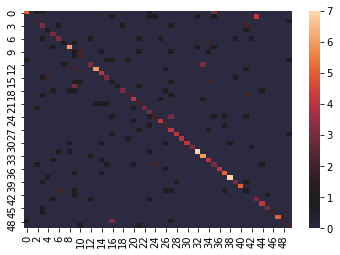

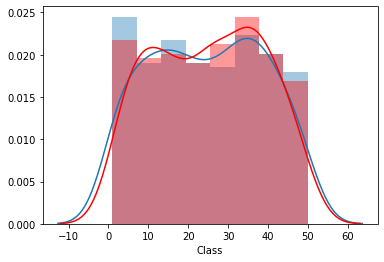

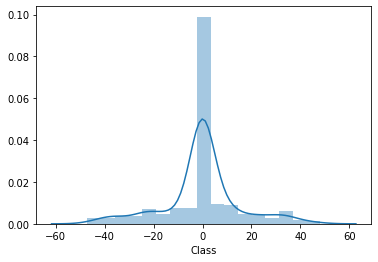

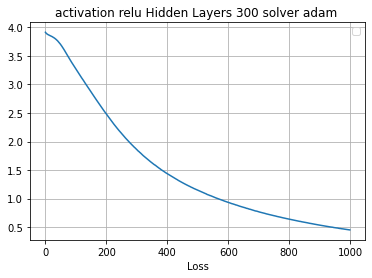

In [42]:
#Best score relu adam hidden layer = 300 Iter 1000 learning rate = constant score=0.66 
clf = MLPClassifier(hidden_layer_sizes=(best_params_N["h"]), max_iter=maxiter, alpha=best_params_N["alpha"],solver=best_params_N["solver"],activation=best_params_N["mode"],tol=1e-9,verbose=False)
clf.fit(X_trainN, Y_train)
Y_predN = clf.predict(X_validN)
LC = clf.loss_curve_
Statistic(Y_valid,Y_predN,"MLP N")
plotLC(LC,best_params_N)


print(classification_report(Y_valid, Y_predN))

# MinMaxscaler

In [43]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_Valid_minmax = min_max_scaler.fit_transform(X_valid)

In [44]:
results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_minmax, X_Valid_minmax, Y_train, Y_valid)
best_params_minmax = FindBestScore(results)
# alpha 0.001 tanh adam learning rate = constant hidden layer 900 Inter 1000 score 0.61

Hidden layers:  300 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.6333333333333333

best_score: 0.6333333333333333
best_params: {'h': 300, 'alpha': 0.0001, 'mode': 'relu', 'solver': 'adam', 'score': 0.6333333333333333}


Heat map: 
No handles with labels found to put in legend.
16.43056095613699
0.029854546598973054
              precision    recall  f1-score   support

         1.0       0.86      0.55      0.67        11
         2.0       1.00      0.11      0.20         9
         3.0       0.17      0.33      0.22         3
         4.0       0.00      0.00      0.00         8
         5.0       0.11      0.50      0.18         2
         6.0       0.00      0.00      0.00         3
         7.0       0.40      0.22      0.29         9
         8.0       0.00      0.00      0.00         4
         9.0       0.90      1.00      0.95         9
        10.0       0.00      0.00      0.00         7
        11.0       0.33      1.00      0.50         3
        12.0       0.67      0.40      0.50         5
        13.0       0.57      0.57      0.57         7
        14.0       0.00      0.00      0.00        10
        15.0       1.00      0.25      0.40         4
        16.0       1.00      0.14     

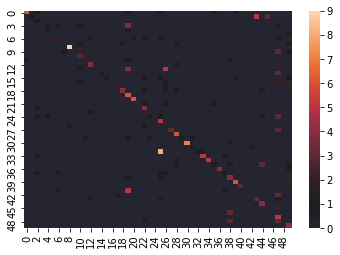

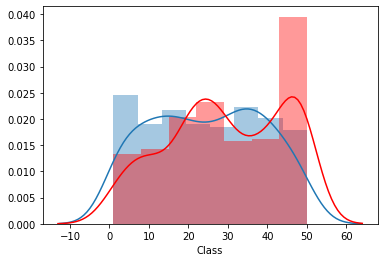

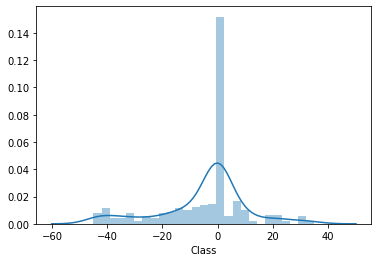

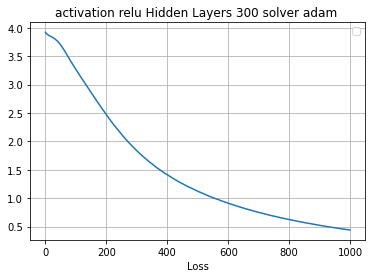

In [46]:
#Best score relu adam hidden layer = 300 Iter 1000 learning rate = constant score=0.66 
clf = MLPClassifier(hidden_layer_sizes=(best_params_minmax["h"]), max_iter=maxiter, alpha=best_params_minmax["alpha"],solver=best_params_minmax["solver"],activation=best_params_minmax["mode"],tol=1e-9,verbose=False)
clf.fit(X_trainN, Y_train)
Y_pred_minmax = clf.predict(X_Valid_minmax)
LC = clf.loss_curve_
Statistic(Y_valid,Y_pred_minmax,"MLP minmax")
plotLC(LC,best_params_minmax)
print(classification_report(Y_valid, Y_pred_minmax))

# quantile_transformer

In [47]:
quantile_transformer = QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_Valid_trans = quantile_transformer.transform(X_valid)


In [48]:
results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_trans, X_Valid_trans, Y_train, Y_valid)
best_params_trans = FindBestScore(results)
# alpha 0.001 tanh adam learning rate = constant hidden layer 900 Inter 1000 score 0.65

Hidden layers:  300 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.6666666666666666

best_score: 0.6666666666666666
best_params: {'h': 300, 'alpha': 0.0001, 'mode': 'relu', 'solver': 'adam', 'score': 0.6666666666666666}


Heat map: 
No handles with labels found to put in legend.
17.632923750756706
0.03372524452086321
              precision    recall  f1-score   support

         1.0       0.42      0.73      0.53        11
         2.0       1.00      0.22      0.36         9
         3.0       0.12      0.33      0.18         3
         4.0       0.00      0.00      0.00         8
         5.0       0.14      0.50      0.22         2
         6.0       0.00      0.00      0.00         3
         7.0       0.50      0.44      0.47         9
         8.0       0.00      0.00      0.00         4
         9.0       0.78      0.78      0.78         9
        10.0       0.00      0.00      0.00         7
        11.0       0.43      1.00      0.60         3
        12.0       0.00      0.00      0.00         5
        13.0       0.36      0.71      0.48         7
        14.0       0.00      0.00      0.00        10
        15.0       0.00      0.00      0.00         4
        16.0       0.29      0.29     

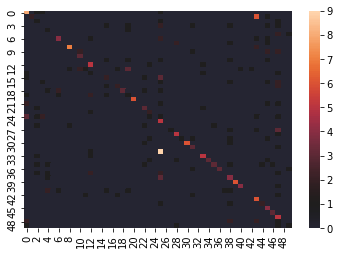

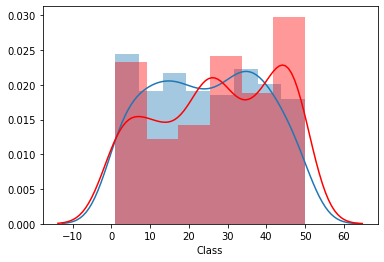

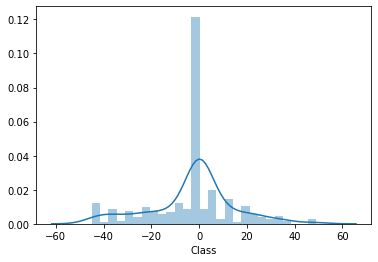

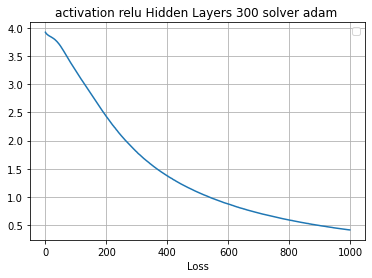

In [49]:
#Best score relu adam hidden layer = 300 Iter 1000 learning rate = constant score=0.66 
clf = MLPClassifier(hidden_layer_sizes=(best_params_trans["h"]), max_iter=maxiter, alpha=best_params_trans["alpha"],solver=best_params_trans["solver"],activation=best_params_trans["mode"],tol=1e-9,verbose=False)
clf.fit(X_trainN, Y_train)
Y_pred_trans = clf.predict(X_Valid_trans)
LC = clf.loss_curve_
Statistic(Y_valid,Y_pred_trans,"MLP trans")
plotLC(LC,best_params_trans)
print(classification_report(Y_valid, Y_pred_trans))

In [ ]:
df = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.lrn.csv')

from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df.drop('Class', axis=1))
#scaled_features = scaler.transform(df.drop('Class', axis=1))
#df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

df_test = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.tes.csv')
df_test_feat = pd.DataFrame(df_test, columns=df.columns[:-1])

X_train = df.Class
X_test = df_test_feat
#X_test = scaler.transform(X_test)
y_train = df['Class']

quantile_transformer = QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)


In [ ]:
df_train = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.lrn.csv')
#df_train["Class"] = df_train["V10001"]
#df_train = df_train.drop(["V10001"], axis=1)
df_train =df_train.drop(["ID"], axis=1)

y = df_train["Class"]
X = df_train.drop(['Class'], axis=1)
#print(X)
df_test = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.tes.csv')
df_test = df_test.drop(["ID"], axis=1)
X_p = df_test

In [ ]:
X_p

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC(n_estimators=2500, max_depth=2, random_state=2511, criterion="gini", min_samples_split=2, min_samples_leaf=1)
rf.fit(X, y)
predicted = rf.predict(X_p)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1000), max_iter=200, alpha=0.001,solver="adam",activation="relu",tol = 1e-9,verbose=True)
clf.fit(X_train_trans, y_train)
Y_pred = clf.predict(X_test_trans)
#accuracy_score(y_train, Y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
oob_scores = [0]
valid_scores = [0]
best_params = None
for n_ests in range(100,1000+1,100):
    print(n_ests)
    rf = RFC(n_jobs=-1, bootstrap=True, oob_score=True, n_estimators=n_ests, max_features="auto")#, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,verbose=0)

    rf.fit(X_train, y_train)
   
    print("oob score:", rf.oob_score_)
    print("max depth:", max([estimator.get_depth() for estimator in rf.estimators_]))
    Y_pred = rf.predict(X_train)
    #score = accuracy_score(Y_valid, Y_pred)
    #print(f"number of validation samples: {X_valid.shape[0]}")
    #print(f"accuracy: {score*100:.2f}% --> {accuracy_score(Y_valid, Y_pred, normalize=False)}")
    #print(f"traintime: {traintime}s")
    print("-"*30)
    

In [ ]:
rf = RFC(n_jobs=-1, bootstrap=True, oob_score=True, n_estimators=1000, max_features="auto")
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_train)

In [ ]:
solution_data = list(zip(list(range(750,1500)), predicted))

In [ ]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'Class'])
solution_table.head()

In [ ]:
solution_table

In [ ]:
solution_table.to_csv(f"results/Amazon/SC_am_sol_2500.csv", index=False)

In [ ]:
solution_table_ref = pd.read_csv('results/Amazon/SC_am_sol.csv')
solution_table = pd.read_csv('results/Amazon/SC_am_sol_1000x3.csv')

In [ ]:
solution_table_ref

In [ ]:
tr = 0
fl = 0
for i in range(len(solution_table)):
    if (solution_table.Class[i] == solution_table_ref.Class[i]):
        #print(i,"True")
        tr = tr + 1
    else:
        #print(i,"False")
        fl = fl + 1
print(tr,fl)
tr/len(solution_table)

In [ ]:
Class_description[int(solution_table.Class[0])]

In [ ]:
print(df.Class[750:1500])

In [ ]:
for i in range(0,len(solution_table.Class)):
    #df.Class[df.Class == Class_description[i]] = i+1
    #solution_table[["Class"]] = Class_description[int(solution_table.Class[i])]
    print(i,Class_description[int(solution_table.Class[i])])
    #print(Class_description[int(solution_table.Class[i])])